# Decision Tree
Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.<br>
<br>***In machine Learning decision tree works in following way***
<br>i) Decision tree works to reduce the impurity in split with each decision and produce pure node.
<br>ii) To reduce the impurity it splits the data on basis of certain rule/feature.
<br>iii) Selection of feature (on which split is done) is based upon **entropy of splits or gini impurity,informaation gain**.
<br>iv)Entropy represents how pure/impure the data in split is ,**H(s) =-P(1)log2(P(1))-P(0)log2(P(0))**
<br>v)Information Gain represents how much entrop we reduced after split. **I(s)=Entropy of State - Weighted Entropy Of State**
<br>IG(S, a) = H(S) – H(S | a)<br>H(S | a) = sum v in a Sa(v)/S * H(Sa(v))
Here  for each split  Sa(v) =no of examples in split a and S is no. of examples in current node(for which split is done) and H(Sa(v)) is the entropy for split a.
<br>vi)Gini impurity is also a measure to calculate purity of a node.**It is computationaly efficient so used in ensemble models in place of entropy**.<br>**GI=1-sum(P^2)**<br>here P^2 = P(1)^2 + P(0)^2
#### Entropy has range [0,1] and Gini Impurity has range [0,0.5]
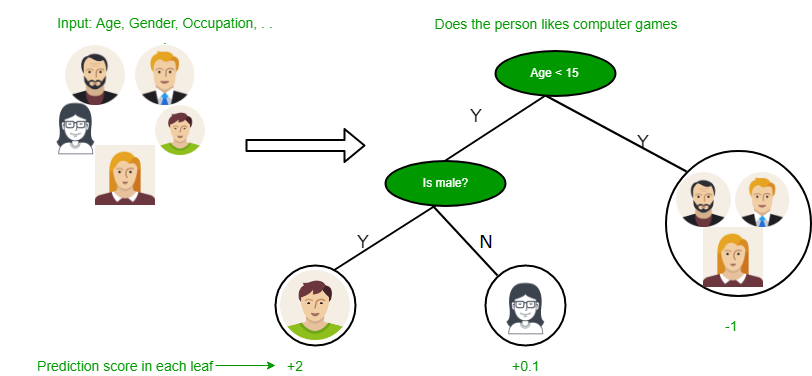
<br>
### ===The decision tree will never create more splits than the number of levels in the Y variable.===<br>
##### Some advantages of decision trees are:
1. Simple to understand and to interpret. Trees can be visualised.<br>
2. Requires little data preparation. Other techniques often require data normalisation, dummy variables need to be created and 3. blank values to be removed. Note however that this module does not support missing values.
4. The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.<br>

#### The disadvantages of decision trees include:
1. Decision-tree learners can create over-complex trees that do not generalise the data well. This is called overfitting. Mechanisms such as pruning, setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.
2. Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
## to compare Decision tree with logistic regression , use titanic data set as its used in  logisticreg.
data=pd.read_csv('titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
data=data.drop(['Name','PassengerId','Ticket'],axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [73]:
data['Cabin'].fillna('Missing',inplace=True)
l=[]
for i in data['Cabin']:
   l.append(str(i)[0])
data['Cabin_init']=l
data=data.drop('Cabin',axis=1)
data=data.dropna()

data['Sex_init']=np.where(data['Sex']=='male','M','F')
data=data.drop('Sex',axis=1)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Cabin_init,Sex_init
0,0,3,22.0,1,0,7.2500,S,M,M
1,1,1,38.0,1,0,71.2833,C,C,F
2,1,3,26.0,0,0,7.9250,S,M,F
3,1,1,35.0,1,0,53.1000,S,C,F
4,0,3,35.0,0,0,8.0500,S,M,M


In [74]:
data.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Cabin_init    0
Sex_init      0
dtype: int64

In [75]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split as tts

In [85]:
data=pd.get_dummies(data,drop_first=True)
x=data.iloc[:,1:]
y=data.iloc[:,:1]
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.3,random_state=42)
print(data.shape)
data.head()

(712, 17)


,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Cabin_init_B,Cabin_init_C,Cabin_init_D,Cabin_init_E,Cabin_init_F,Cabin_init_G,Cabin_init_M,Cabin_init_T,Sex_init_M
0,0,3,22.0,1,0,7.2500,0,1,0,0,0,0,0,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,1,0,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,1,0,0,0,0,0,0,1,0,0
3,1,1,35.0,1,0,53.1000,0,1,0,1,0,0,0,0,0,0,0
4,0,3,35.0,0,0,8.0500,0,1,0,0,0,0,0,0,1,0,1


In [80]:
#decision tree using Gini Index also called gini impurity
tree_gini=DecisionTreeClassifier(criterion='gini',random_state=42,max_depth=5,min_samples_leaf=5)
tree_gini.fit(x_train,y_train)
y_pred=tree_gini.predict(x_train)

In [82]:
y_test_pred=tree_gini.predict(x_test)
print('Accuracy Score-train : ',accuracy_score(y_train,y_pred))
print('Accuracy Score-test : ',accuracy_score(y_test,y_test_pred))


Accuracy Score-train :  0.8694779116465864
Accuracy Score-test :  0.7757009345794392


In [96]:
print('Training Data')
print('------------------------------------------------------')
print(classification_report(y_train,y_pred))
print('------------------------------------------------------')
print('Test Data')
print('------------------------------------------------------')
print(classification_report(y_test,y_test_pred))

Training Data
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       302
           1       0.89      0.76      0.82       196

    accuracy                           0.87       498
   macro avg       0.88      0.85      0.86       498
weighted avg       0.87      0.87      0.87       498

------------------------------------------------------
Test Data
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       122
           1       0.78      0.66      0.72        92

    accuracy                           0.78       214
   macro avg       0.78      0.76      0.77       214
weighted avg       0.78      0.78      0.77       214



In [92]:
confusion_matrix(y_train,y_pred)

array([[284,  18],
       [ 47, 149]], dtype=int64)

In [97]:
#decision tree using entropy
tree_entropy=DecisionTreeClassifier(criterion='entropy',random_state=42,max_depth=5,min_samples_leaf=5)
tree_entropy.fit(x_train,y_train)
y_pred1=tree_entropy.predict(x_train)

In [98]:
y_test_pred1=tree_entropy.predict(x_test)
print('Accuracy Score-train : ',accuracy_score(y_train,y_pred1))
print('Accuracy Score-test : ',accuracy_score(y_test,y_test_pred1))

Accuracy Score-train :  0.8654618473895582
Accuracy Score-test :  0.7710280373831776


In [99]:
print('Training Data')
print('------------------------------------------------------')
print(classification_report(y_train,y_pred1))
print('------------------------------------------------------')
print('Test Data')
print('------------------------------------------------------')
print(classification_report(y_test,y_test_pred1))

Training Data
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.97      0.90       302
           1       0.94      0.70      0.80       196

    accuracy                           0.87       498
   macro avg       0.89      0.84      0.85       498
weighted avg       0.88      0.87      0.86       498

------------------------------------------------------
Test Data
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.89      0.82       122
           1       0.81      0.61      0.70        92

    accuracy                           0.77       214
   macro avg       0.78      0.75      0.76       214
weighted avg       0.78      0.77      0.76       214



In [100]:
confusion_matrix(y_train,y_pred1)

array([[293,   9],
       [ 58, 138]], dtype=int64)